### Learning to use Scikit-learn: Heart Disease Detection project. 
#### We built a machine learning model to predict heart disease using Scikit-learn. With 87% accuracy, this model can assist in early detection of cardiovascular risks.

#### Following algorithms have been used and evaluated to choose the best performing model for our project: KNN, SVM, Decision Trees and Random Forest

#### Metrics like Accuracy, Classification Report (Precision, Recall and F1-Score) and Confusion Matrix have been demonstrated.

### Step 1. Import necessary libraries

In [2]:
import pandas as pd

In [3]:
# import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Step 2. Load the dataset

In [4]:
dataset = pd.read_csv('/Users/meetkamalkaursahni/Documents/scikit-learn project/heart.csv')

In [5]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Step 3. Data Preprocessing

#### a) One-Hot Encoding  b) Feature Scaling

In [8]:
print(np.unique(dataset[['cp']].values))
print(np.unique(dataset[['thal']].values))
print(np.unique(dataset[['ca']].values))
print(np.unique(dataset[['sex']].values))

[0 1 2 3]
[0 1 2 3]
[0 1 2 3 4]
[0 1]


##### In Pandas, the get_dummies() function performs one-hot encoding and can be applied to the entire DataFrame at once and returns the dataframe of dummy coded data.

In [9]:
# One-Hot Encode Categorical Columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(dataset, columns=categorical_columns)

In [10]:
# Initialize StandardScaler
standardScaler = StandardScaler()

In [11]:
# List of numerical columns to scale
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
# Apply StandardScaler transformation to selected columns
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [13]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Step 4. Split the data

In [14]:
# Separate Features and Target Variable
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Step 5. Train the Random Forest Classifier

In [15]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 6. Make Predictions

In [16]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


### Step 7. Evaluate the Model

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Compare predictions with actual test labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')  # Display accuracy

# Show detailed performance metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### Our model predicts heart disease with 87% accuracy, which means it is mostly reliable.
However, we also check precision (88%) to see how often a predicted disease case is actually correct and recall (88%) to see how well we detect real cases.
The F1-score (88%) ensures a good balance between these two.
Overall, the model performs well in predicting heart disease, but false positives or negatives could still occur.

### K-Nearest Neighbors (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
# Make Predictions
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [21]:
# Evaluate Model
print("KNN Model Performance:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')

KNN Model Performance:
Accuracy: 0.9016393442622951


In [22]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [34]:
#Check if knn is overfitting:

train_accuracy = accuracy_score(y_train, knn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.88
Testing Accuracy: 0.90


If training accuracy is much higher than testing accuracy → The model might be overfitting.

### Support Vector Machine (SVM)

In [35]:
from sklearn.svm import SVC

In [37]:
# Initialize and Train SVM Model
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [38]:
#Make Predictions
y_predict_svc = svc.predict(X_test)

In [39]:
print(y_predict_svc)

[0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]


In [44]:
#Evaluate Model
print("SVM Model Performance: ")
print(f"Accuracy: {accuracy_score(y_test, y_predict_svc):.2f}")
print(f"Classification Report: {classification_report(y_test,y_predict_svc)}")

SVM Model Performance: 
Accuracy: 0.87
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1
 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [52]:
print("Decision Tree Performance: ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Classification Report: {classification_report(y_test, y_pred_dt)}")

Decision Tree Performance: 
Accuracy: 0.82
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### 📌 Compare the Model Performances

In [77]:
# Create a dictionary to store accuracy scores
model_scores = {
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVM": accuracy_score(y_test, y_predict_svc),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred)
}

# Print accuracy comparison
print("\nModel Comparison:")
for model, score in model_scores.items():
    print(f"{model}: {score:.2f}")



Model Comparison:
KNN: 0.90
SVM: 0.87
Decision Tree: 0.82
Random Forest: 0.87


### 📌 Generate the Confusion Matrix

In [73]:
print("KNN Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

KNN Confusion Matrix:
[[26  3]
 [ 3 29]]


In [74]:
print("Random Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

Random Forest Confusion Matrix:
[[25  4]
 [ 4 28]]


### 📌 Plot the Confusion Matrix

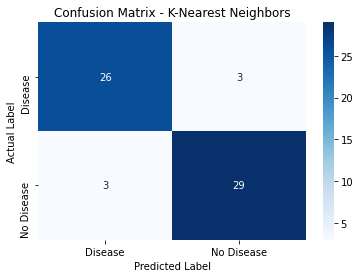

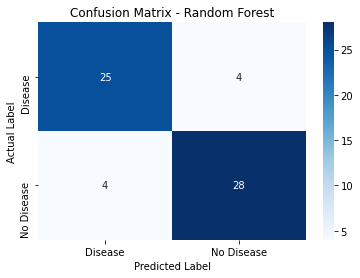

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Disease", "No Disease"], yticklabels=["Disease", "No Disease"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for KNN
plot_confusion_matrix(cm_knn, "K-Nearest Neighbors")

# Plot for Random Forest
plot_confusion_matrix(cm_rf, "Random Forest")

In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation
knn_scores = cross_val_score(knn, X, y, cv=5)  # KNN Model
rf_scores = cross_val_score(rf_classifier, X, y, cv=5)  # Random Forest Model

# Print Mean Accuracy
print(f"KNN Mean Accuracy: {knn_scores.mean():.2f}")
print(f"Random Forest Mean Accuracy: {rf_scores.mean():.2f}")

KNN Mean Accuracy: 0.83
Random Forest Mean Accuracy: 0.83
